In [20]:
#Imports
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
dado = pd.read_csv("graph2.csv")

In [21]:
dado.head()

,vertice,adjacente,peso,color
0,A. Barbosa,Computação,260,#00FF11
1,A. Paes,Computação-Zootecnia,220-60,#00FF11
2,Elthon,Computação-Adm Pública,120-80,#00FF11
3,Mário,Computação-Tronco Ini,80-120,#00FF11
4,Patrick,Computação,220,#00FF11


In [22]:
#Criando grafo e adicionando vertices
graph = nx.Graph()
graph.add_nodes_from(dado.vertice)

In [23]:
#Criando as arestas com os pesos
for i in range(len(dado.vertice.values)):
    if pd.isnull(dado.adjacente[i]) == False:
        edges = dado.adjacente[i].split("-")
        pesos = dado.peso[i].split("-")
        for j in range(len(edges)):
            print(dado.vertice[i],edges[j],pesos[j])
            graph.add_weighted_edges_from([(dado.vertice[i],edges[j],pesos[j])]) #Arestas com pesos


A. Barbosa Computação 260
A. Paes Computação 220
A. Paes Zootecnia 60
Elthon Computação 120
Elthon Adm Pública 80
Mário Computação 80
Mário Tronco Ini 120
Patrick Computação 220
Raquel Computação 0
R. Afonso Computação 60
R. Afonso Matemática 60
R. Afonso Física 60
R. Afonso Agronomia 60
Rodolfo Computação 180
Rodolfo Tronco Ini 80
Rômulo Computação 60
Rômulo Tronco Ini 160
Tácito Computação 220
Tércio Computação 140
Tércio Biologia 60
Thiago Computação 200


In [24]:
#Colocando os pesos em uma lista
edges = graph.edges
weights = [graph[u][v]['weight'] for u,v in edges]

In [25]:
#Reescala a largura das arestas
for i in range(len(weights)):
    weights[i] = int(weights[i])
weights_f = [*map(lambda el: el / max(weights) * 10, weights)] #By: Emerson

In [26]:
#Colocando as arestas em uma lista
edges= []
for i in graph.edges:
    edges.append(i)

In [27]:
#Criando o dicionário com os pesos das edges para as labels
edge_labels = {}
for i in range(len(edges)):
    edge_labels[edges[i]] = weights[i]
weights

[260,
 220,
 60,
 120,
 80,
 80,
 120,
 220,
 0,
 60,
 60,
 60,
 60,
 180,
 80,
 60,
 160,
 220,
 140,
 60,
 200]

In [28]:
#Descobrindo os pesos dos vértices / Opção 1 (para grafos direcionados)
weights_node = []
for i in range(len(dado.peso.values)):
    if pd.isnull(dado.adjacente[i]) == False:
        aux = dado.peso[i].split("-")
        for i in range(len(aux)):
            aux[i] = int(aux[i])
        weights_node.append(sum(aux))
    else:
        weights_node.append(1)
weights_node

[260,
 280,
 200,
 200,
 220,
 0,
 240,
 260,
 220,
 220,
 200,
 200,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [29]:
#Descobrindo os pesos dos vértices / Opção 2 (Para grafos não direcionados)
weights_node = []
w = nx.get_edge_attributes(graph, 'weight')
_a = 1
for i in graph.nodes:
    for j in graph.nodes:
        if (i, j) in w:
            _a += int(w[(i, j)])
        elif (j,i) in w:
            _a += int(w[(j, i)])
    if _a != 1:
        weights_node.append(_a-1)
    else:
        weights_node.append(_a)
    _a = 1
    print(weights_node)

[260]
[260, 280]
[260, 280, 200]
[260, 280, 200, 200]
[260, 280, 200, 200, 220]
[260, 280, 200, 200, 220, 1]
[260, 280, 200, 200, 220, 1, 240]
[260, 280, 200, 200, 220, 1, 240, 260]
[260, 280, 200, 200, 220, 1, 240, 260, 220]
[260, 280, 200, 200, 220, 1, 240, 260, 220, 220]
[260, 280, 200, 200, 220, 1, 240, 260, 220, 220, 200]
[260, 280, 200, 200, 220, 1, 240, 260, 220, 220, 200, 200]
[260, 280, 200, 200, 220, 1, 240, 260, 220, 220, 200, 200, 1760]
[260, 280, 200, 200, 220, 1, 240, 260, 220, 220, 200, 200, 1760, 80]
[260, 280, 200, 200, 220, 1, 240, 260, 220, 220, 200, 200, 1760, 80, 60]
[260, 280, 200, 200, 220, 1, 240, 260, 220, 220, 200, 200, 1760, 80, 60, 60]
[260, 280, 200, 200, 220, 1, 240, 260, 220, 220, 200, 200, 1760, 80, 60, 60, 60]
[260, 280, 200, 200, 220, 1, 240, 260, 220, 220, 200, 200, 1760, 80, 60, 60, 60, 60]
[260, 280, 200, 200, 220, 1, 240, 260, 220, 220, 200, 200, 1760, 80, 60, 60, 60, 60, 60]
[260, 280, 200, 200, 220, 1, 240, 260, 220, 220, 200, 200, 1760, 80, 60, 

In [30]:
#Reescalando os pesos dos vértices
weights_node = [*map(lambda el: el / max(weights_node) * 1e4, weights_node)] #By: Emerson

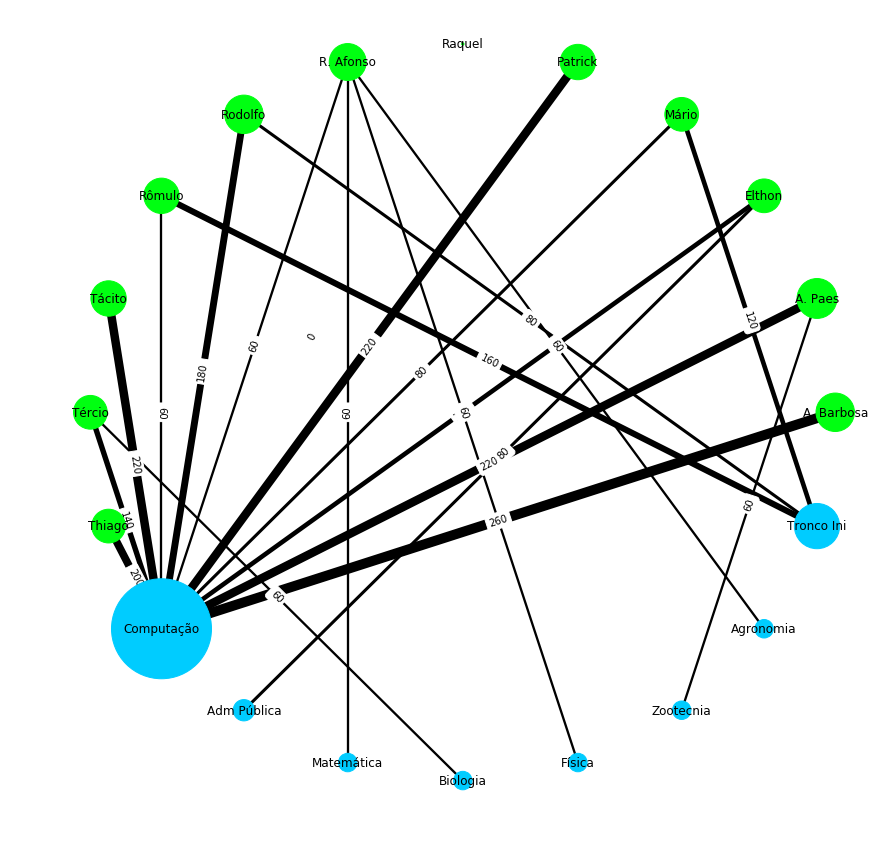

In [31]:
#Plotando o gráfico
#------------------------------------------
fig = plt.figure(figsize = (15,15)) #By: Jadson -> Aumentar o tamanho do gráfico
ax = fig.add_subplot(1,1,1)
#------------------------------------------
#Plotando gráfico
pos = nx.circular_layout(graph)
nx.draw(graph,
        pos,
        node_color=dado.color.values,
        node_size=weights_node,
        with_labels=True,
        alpha = 1,
        width=weights_f,
        ax = ax)

#Plotando edge labels
edge_labels = nx.get_edge_attributes(graph,'weight')
nx.draw_networkx_edge_labels(graph, pos, edge_labels = edge_labels)
plt.savefig("graph.png")